# THE STANFORDOPEN POLICINGPROJECT part 2

## ใช้ search เป็น label ในการหาว่าใครจะโดนตรวจ  
## ต้องตัดส่วนของ arrest_made ออกไป

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## จุดมุ่งหมายของการทำ Machine Learning model
  มาลองคิดวิเคราห์ดูกันสนุกๆ ก่อน จากข้อมูลชุดนี้ที่เรามี สามารถนำไปใช้ประโยชน์อะไรได้บ้าง

1. ด้านมืด ตัว model นี้ ถ้านำไปใช้ในกรณีผู้ต้องการทำสิ่งผิดกฏหมาย ลักลอบนำสิ่งผิดกฏหมายต่างๆ เช่น อาวุธ ยาเสพย์ติด สามารถรู้ได้ว่า ต้องเลือกใช้ transporter ประเภท ลักษณะ เชื้อชาติ เพศ แบบไหนถึงจะหลบเลี่ยงต่อการถูกจับ และถูกตรวจค้นได้มากที่สุด หรือ หลีกเลี่ยงการฝ่าฝืนกฏจราจร อันเพิ่มความเสี่ยงให้เกิดการถูกตรวจค้นและโดนค้นหาสิ่งผิดกฏหมายในยานพาหนะในที่สุด
2. ด้านสว่าง ฝั่งนี้ก็จะเป็นประโยชน์แก่ตำรวจเอง สองประเด็นย่อย คือ หนึ่ง ทำให้ตำรวจไม่ bias หรือ อคติต่อคนจำพวกไหนจำพวกหนึ่งมากเกินไป และ ไม่ปล่อยปะหละหลวมกับคนอีกจำพวกหนึ่ง ทำให้การปฏิบัติหน้าที่มีความรอบคอบมากขึ้น สอง เมื่อการปฏิบัติหน้าที่มีความรอบคอบ และเท่าเทียมกันต่อทุกคนทุกความหลากหลายของกลุ่มคน ทำให้มีภาพลักษณ์ต่อสาธารณชนดีขึ้นไม่มีการเลือกปฏิบัติต่อกลุ่มคนบางกลุ่ม ป้องกันไม่ให้เกิดปัญหาตามมาเช่น ข่าวดังที่ติด hashtag ไปทั่วเรื่อง #blacklivematter นั่นเอง

# เริ่มสร้าง Machine learning model กันเลยครับ

  กำหนดตัวผลลัพท์จาก model ที่เราต้องการ
ขั้นแรก เราต้องการให้ผลลัพท์คือ ค่า y_pred (ค่าการทำนายจาก model) จากข้อมูลของการปฏิบัติงานของตำรวจใน Rhode Island ที่เกิดขึ้นจริงและเก็บ record ไว้ ในครั้งนี้จะมาสนใจในการทำ model ว่าจากพื้นฐานข้อมูลที่มีอยู่นี้ลักษณะการปฏิบัติงานของตำรวจส่งผลต่อการ ตรวจค้นยานพาหนะในท้ายที่สุดหรือไม่ นั่นก็คือ เราให้ label ที่ต้องการจะ model บอกเราครับ เพราะฉะนั้น จากตารางที่เรามีข้างล่างจะเห็นว่า ควร drop เรื่องของการถูกจับกุมหลังตรวจค้นยานพาหนะทิ้งไปเนื่องจากเป็นผลที่เกิดหลังจากพบเจอสิ่งผิดกฏหมาย
<br>
<br>
  <b><U>ให้ label หรือผลลัพธ์ที่ต้องการจาก model ที่ได้คือ search_conducted ก็คือการตรวจค้นยานพาหนะ<b><u>

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Importing the dataset and prepare prior to model input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw = pd.read_csv('/content/drive/MyDrive/DS511 Data Science/ProjectFinalDS711_110_115/PoliceRI2020cleaned.csv',index_col= "date_stop_time")

In [ ]:
raw.head()

,district,driver_race,driver_gender,arrest_made,citation_issued,warning_issued,contraband_drugs,contraband_weapons,contraband_alcohol,frisk_performed,search_conducted,reason_for_stop
date_stop_time,,,,,,,,,,,,
2005-11-22 11:15:00,X3,white,male,False,True,False,False,False,False,False,False,Speeding
2005-10-01 12:20:00,X3,white,male,False,True,False,False,False,False,False,False,Speeding
2005-10-01 12:30:00,X3,white,female,False,True,False,False,False,False,False,False,Speeding
2005-10-01 12:50:00,X3,white,male,False,True,False,False,False,False,False,False,Speeding
2005-10-01 13:10:00,X3,white,female,False,True,False,False,False,False,False,False,Speeding


## ทำการสลับให้ column ที่เป็น label ไปอยู่ท้ายสุดให้ง่ายต่อการเลือก column ในการทำงาน
  

ข้อมูลเป็นแบบตารางที่ทำการ clean มาเรียบร้อยแล้วแต่ยังต้องมีการจัดเรียงให้ง่ายต่อการป้อนเข้าสู่ model ของ ML: machine learning ต่อไป เราจะกำหนดจากจุดมุ่งหมายได้บน

In [ ]:
raw.columns

Index(['district', 'driver_race', 'driver_gender', 'arrest_made',
       'citation_issued', 'warning_issued', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'frisk_performed',
       'search_conducted', 'reason_for_stop'],
      dtype='object')

In [ ]:
raw = raw[['district', 'driver_race', 'driver_gender', 'arrest_made',
       'citation_issued', 'warning_issued', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'frisk_performed',
       'reason_for_stop', 'search_conducted']]
raw.head()

,district,driver_race,driver_gender,arrest_made,citation_issued,warning_issued,contraband_drugs,contraband_weapons,contraband_alcohol,frisk_performed,reason_for_stop,search_conducted
date_stop_time,,,,,,,,,,,,
2005-11-22 11:15:00,X3,white,male,False,True,False,False,False,False,False,Speeding,False
2005-10-01 12:20:00,X3,white,male,False,True,False,False,False,False,False,Speeding,False
2005-10-01 12:30:00,X3,white,female,False,True,False,False,False,False,False,Speeding,False
2005-10-01 12:50:00,X3,white,male,False,True,False,False,False,False,False,Speeding,False
2005-10-01 13:10:00,X3,white,female,False,True,False,False,False,False,False,Speeding,False


ต่อไป คือการทำการ drop column "arrest_made" ควร drop เรื่องของการถูกจับกุมหลังตรวจค้นยานพาหนะทิ้งไปเนื่องจากเป็นผลที่เกิดหลังจากพบเจอสิ่งผิดกฏหมายโดยใช้ code ดังนี้

In [ ]:
raw.drop('arrest_made', axis=1, inplace= True)
raw.head()

,district,driver_race,driver_gender,citation_issued,warning_issued,contraband_drugs,contraband_weapons,contraband_alcohol,frisk_performed,reason_for_stop,search_conducted
date_stop_time,,,,,,,,,,,
2005-11-22 11:15:00,X3,white,male,True,False,False,False,False,False,Speeding,False
2005-10-01 12:20:00,X3,white,male,True,False,False,False,False,False,Speeding,False
2005-10-01 12:30:00,X3,white,female,True,False,False,False,False,False,Speeding,False
2005-10-01 12:50:00,X3,white,male,True,False,False,False,False,False,Speeding,False
2005-10-01 13:10:00,X3,white,female,True,False,False,False,False,False,Speeding,False


### ทดลองดึงข้อมูลออกมาดูจากแถวที่ 25 โดยไม่รวมเอา column ที่เป็น Label (ผลลัพธ์) ออกมาด้วย ว่าข้อมูลมีลักษณะอย่างไร

In [ ]:
raw.iloc[25, :-1].values

array(['X3', 'white', 'male', True, False, False, False, False, False,
       'Speeding'], dtype=object)

## ทำการแบ่งชุดข้อมูลให้เป็นส่วนของการ train ของ model และ ส่วน Label ของ model

In [ ]:
X = raw.iloc[:, :-1].values
y = raw.iloc[:, -1].values
print("X :", X)
print("y :", y)
print("X shape :", X.shape)

X : [['X3' 'white' 'male' ... False False 'Speeding']
 ['X3' 'white' 'male' ... False False 'Speeding']
 ['X3' 'white' 'female' ... False False 'Speeding']
 ...
 ['K3' 'white' 'female' ... False False 'Speeding']
 ['X4' 'white' 'male' ... False False 'Equipment/Inspection Violation']
 ['X4' 'white' 'female' ... False False 'Speeding']]
y : [False False False ... False False False]
X shape : (480584, 10)


## Encoding the Independent Variable


### ขั้นตอนนี้เป็นการทำการแปลงข้อมูลของค่า X ที่เป็นข้อมูลไว้สำหรับเป็น Train Model โดยจะแปลงที่ column "district", "driver_race", "driver_gender",
"reason_for_stop" ที่เป็นข้อมูล Categorical Data ให้แตกเป็น Column ย่อย ๆ
และเก็บข้อมูลเป็นแบบ Binary (เก็บค่าที่เป็น 0 หรือ 1 เท่านั้น)

โดยปกติเราสามารถใช้ ฟังก์ชั่น getdummy() ได้ แต่ในที่นี้ขอใช้เป็น preprocessing ใน sklearn มาอำนวยความสะดวกในการทำ คือการใช้ ColumnTranformer และ
OneHotEncoder


และจะเห็นได้ว่าหลังจากผ่านกระบวนการนี้ ตัว feature ของค่า X จะมีขนาดเพิ่มจาก 10 เป็น 31 features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)
print(X.shape)

[[0.0 0.0 0.0 ... False False False]
 [0.0 0.0 0.0 ... False False False]
 [0.0 0.0 0.0 ... False False False]
 ...
 [0.0 0.0 1.0 ... False False False]
 [0.0 0.0 0.0 ... False False False]
 [0.0 0.0 0.0 ... False False False]]
(480584, 31)


ทดลองดึง row ที่ 25 เช่นเดิมเพื่อดูว่าข้อมูลเป็นอย่างไรหลังจากทำผ่านการใช้ OneHotencoder ลองนำไปเทียบกับ row ที่ 25  ที่เราดึงจากตารางก่อนผ่านกระบวนการดูได้

In [ ]:
print(X[25])
print(X[25].shape)

[0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 1.0 0.0 0.0 0.0 True False False False False False]
(31,)


## Encoding the Dependent Variable

### ขั้นตอนนี้เป็นการทำการแปลงข้อมูลของค่า y ที่เป็นข้อมูลไว้สำหรับเป็น Label model จากเดิมเป็นค่า boolean คือ True, False ให้เป็นค่า Binary (คือ 0 และ 1) โดยที่ 0 คือการไม่โดนตรวจค้นยานพาหนะ และ 1 คือโดนตรวจค้นยานพาหนะ

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)
print(y.shape)

[0 0 0 ... 0 0 0]
(480584,)


## Splitting the dataset into the Training set and Test set

### ทำการแยกส่วนของ Training set และ Test set ด้วยการใช้ ฟังก์ชั่น train_test_split ในที่นี้ใช้ test_size 20 เปอร์เซ็นต์ของข้อมูลที่มี 80 เปอร์เซ็นต์ใช้ในการ train model

และลอง print ค่าของ X_train, X_test , y_train, y_test ออกมาดู และ ขนาดของค่าต่างๆ ก็สำคัญ ไว้ดูว่า มี feature ที่ป้อนไปถูกต้องเท่ากันหรือไม่ เมื่อมีปัญหามาดูในภายหลังจะง่ายต่อการหาวิธีการแก้ไข

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.20, random_state= 1)

In [ ]:
print(X_train)
print("X_train shape :", X_train.shape)

[[0.0 0.0 1.0 ... False False False]
 [0.0 0.0 0.0 ... False False False]
 [0.0 0.0 0.0 ... False False False]
 ...
 [0.0 0.0 1.0 ... False False False]
 [0.0 1.0 0.0 ... False False False]
 [0.0 1.0 0.0 ... False False False]]
X_train shape : (384467, 31)


In [ ]:
print(X_test)
print("X_test shape :", X_test.shape)

[[0.0 0.0 0.0 ... False False False]
 [0.0 0.0 0.0 ... False False False]
 [0.0 0.0 1.0 ... False False False]
 ...
 [0.0 0.0 0.0 ... False False False]
 [0.0 0.0 0.0 ... False False False]
 [0.0 1.0 0.0 ... False False False]]
X_test shape : (96117, 31)


In [ ]:
print(y_train)
print("y_train shape :", y_train.shape)

[0 0 0 ... 0 0 0]
y_train shape : (384467,)


In [ ]:
print(y_test)
print("y_test shape :", y_test.shape)

[0 0 0 ... 0 0 0]
y_test shape : (96117,)


จากขนาดของข้อมูลแต่ละคู่ จะเห็นว่าจำนวน row ของ ตัวข้อมูลที่คู่กันระหว่าง X_train และ y_train นั้นเท่ากัน เช่นเดียวกับคู่ของ X_test และ y_test 

## Feature Scaling

### การทำ Scaling ช่วยเพิ่มประสิทธิภาพให้กับการ train model ได้ การทำการ scaling ทำที่ขั้นตอนหลังจากแยกชุดข้อมูล ระหว่าง test และ train แล้วเพื่อป้องกันการรั่วของข้อมูล หรือ data leakage

และเช่นเดิม ลอง print ค่าของ X_train, X_test ออกมาดู และ ขนาดของค่าต่างๆ ก็สำคัญ

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_train)
print(X_train.shape)

[[-0.32624222 -0.50368994  1.84647782 ... -0.03251344 -0.04852047
  -0.14070626]
 [-0.32624222 -0.50368994 -0.54157163 ... -0.03251344 -0.04852047
  -0.14070626]
 [-0.32624222 -0.50368994 -0.54157163 ... -0.03251344 -0.04852047
  -0.14070626]
 ...
 [-0.32624222 -0.50368994  1.84647782 ... -0.03251344 -0.04852047
  -0.14070626]
 [-0.32624222  1.98534838 -0.54157163 ... -0.03251344 -0.04852047
  -0.14070626]
 [-0.32624222  1.98534838 -0.54157163 ... -0.03251344 -0.04852047
  -0.14070626]]
(384467, 31)


In [ ]:
print(X_test)
print(X_test.shape)

[[-0.32389413 -0.50415171 -0.5396304  ... -0.03112086 -0.04756862
  -0.14039817]
 [-0.32389413 -0.50415171 -0.5396304  ... -0.03112086 -0.04756862
  -0.14039817]
 [-0.32389413 -0.50415171  1.85312021 ... -0.03112086 -0.04756862
  -0.14039817]
 ...
 [-0.32389413 -0.50415171 -0.5396304  ... -0.03112086 -0.04756862
  -0.14039817]
 [-0.32389413 -0.50415171 -0.5396304  ... -0.03112086 -0.04756862
  -0.14039817]
 [-0.32389413  1.9835299  -0.5396304  ... -0.03112086 -0.04756862
  -0.14039817]]
(96117, 31)


จากขนาดของข้อมูลแต่ละคู่ จะเห็นว่าจำนวน feature ยังเท่าเดิมคือ31 และจำนวน row ยังเท่าเดิมกับก่อนหน้าการทำ scaling ทั้งของ X_train และ X_test

## Training model on KNeighborsClassifier

In [ ]:
#ฺerror stopper/ run all stoper
print(ttt)

### ลอง ใช้ KNN model เนื่องจากในทางทฤษฏีแล้วตัวโมเดลตัวนี้ทำงาน และ predict ช้า จึงแยกมาทำตัวเดียวก่อนครับ

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Making the Confusion Matrix for KNN

และวัดผลจากคะแนนต่างๆ เช่น accuracy score และ F1_score ของ KNN model

[[92520    28]
 [ 1143  2426]]
accuracy_score ของ model KNN : 0.9878169314481309
f1_score ของ model KNN : 0.805578615307986


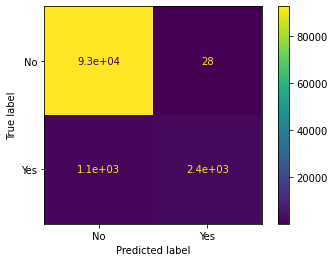

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score

y_pred = knnclf.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
print("accuracy_score ของ model KNN :",accuracy_score(y_test, y_pred))
print("f1_score ของ model KNN :",f1_score(y_test, y_pred))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['No','Yes'])
cmd.plot()

การใช้ KNN ใช้เวลาในการรัน train และเมื่อ train เสร็จ การ predict ก็ทำงานได้ช้ามากเมื่อขนาดของข้อมูลใหญ่มากแบบนี้ ประมาณ 1 ชั่วโมง

## Training model on the Training set with different classifier model


ต่อมาจึงลองใช้ หลาย model เพื่อดูผลคร่าวๆ ของการเรียนรู้ ที่ค่า hyperparameter ยังเป็นค่าเริ่มต้นอยู่ (default)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
# Create a report for each model
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn import metrics

algo = [
        [LogisticRegression(),'LogisticRegression'],
        [GaussianNB(),'GaussianNB'],
        [GradientBoostingClassifier(),'GradientBoostingClassifier'],
        [AdaBoostClassifier(),'AdaBoostClassifier'],
        [RandomForestClassifier(),'RandomForestClassifier']
  ]

for a in algo:
    model=a[0]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'{a[0]} score: {model.score(X_test,y_test)}')
    print("f1_score:",f1_score(y_test, y_pred))
    print(metrics.confusion_matrix(y_test,y_pred))
    print(metrics.classification_report(y_test,y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) score: 0.9880354151710936
f1_score: 0.8079492317969272
[[92548     0]
 [ 1150  2419]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     92548
           1       1.00      0.68      0.81      3569

    accuracy                           0.99     96117
   macro avg       0.99      0.84      0.90     96117
weighted avg       0.99      0.99      0.99     96117

GaussianNB(priors=None, var_smoothing=1e-09) score: 0.037131828916840935
f1_score: 0.07160483919507253
[[    0 92548]
 [    0  3569]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     92548
           1       0.04      1.00      0.07      3569

    accuracy                           0.04     96117
   macro avg       0.02      0.50      0.04     96117
weighted avg       0.00      0.04      0.00     96117

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                     

จากการวัดผลค่าต่างๆ เนื่องจากคะแนนต่างๆ มีความใกล้เคียงกัน และ ด้วยความที่ logistic regression มีความซับซ้อนน้อยกว่า หลังจากนี้จะเลือกใช้ Logistic Regression model เพื่อทำการ Tune hyperparameter และวัดผลของ model ต่อไปครับ

## Training the Logistic Regression model on the Training set

### ทำการ fit เพื่อ train model 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting a new result on newdriver

### ลองใส่ชุดข้อมูลใหม่จากคนขับใหม่ที่ลองสร้างเองขึ้นมาครับว่า model ของเราใช้งานได้ และ ทำนายออกมาว่าจะโดนตรวจค้นยานพาหนะหรือไม่ และเมื่อสร้างข้อมูลขึ้นมาใหม่ จะต้องทำการ OneHotEncoder กับข้อมูลใหม่นี้ด้วยให้ตรงกับ shape ของการป้อนเข้าไปใส่ให้ model

In [ ]:
# ให้ สมมตคนขับรถขึ้นมาหนึ่งคัน โดยมีข้อมูลดังนี้
newdriver = [['X4', 'white', 'female', True, False, False, False, False, False, 'Speeding']]
newdriver_encode = np.array(ct.transform(newdriver))

newdriver_encode

array([[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, True,
        False, False, False, False, False]], dtype=object)

### ต้องทำการ scaling ก่อนเข้า model ด้วย



In [ ]:
newdriver_scale = sc.transform(newdriver_encode)
print(newdriver_scale)
print(newdriver_scale.shape)

[[-0.32389413 -0.50415171 -0.5396304  -0.16779228 -0.48033628  1.67826991
  -0.16720144 -0.40902843 -0.3546945  -0.0533702   0.6315206   1.62721923
  -1.62721923 -0.02975099 -0.12730992 -0.38386271 -0.04367564 -0.48159896
  -0.20685527 -0.18745983 -0.17046079  0.88967578 -0.02718877 -0.04611862
  -0.01737258  0.3496369  -0.25387786 -0.10017743 -0.03112086 -0.04756862
  -0.14039817]]
(1, 31)


In [ ]:
print(classifier.predict(newdriver_scale))

[0]


In [ ]:
classifier.predict_proba(sc.transform(newdriver_scale))

array([[9.99806093e-01, 1.93907426e-04]])

In [ ]:
classifier.predict_log_proba(sc.transform(newdriver_scale))

array([[-1.93926229e-04, -8.54812970e+00]])

## Predicting the Test set results

### มาลองทดสอบวัดผลของ model โดยใช้ Test set ที่แยกไว้ตั้งแต่แรก ซึ่งเรามีผลลัพธ์ที่เกิดขึ้นจริงมาเปรียบเทียบกับโมเดล ทำให้เราสามารถวัดประสิทธิภาพความแม่นยำ ความเที่ยงตรง และค่าการวัดผลรูปแบบต่างๆ ได้จาก Test set นี้

In [ ]:
classifier.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), axis=1))
print(y_pred.shape)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
(96117,)


ตัวแรกคือ predict และ ตัวที่สองคือค่าจริง ที่คนโดนตรวจค้นในรถหรือไม่โดน  
0 คือไม่โดน  
1 คือโดนตรวจค้นรถ

## Making the Confusion Matrix

ใช้ Confusion Matrix มาช่วยในการ evaluation

[[92548     0]
 [ 1150  2419]]
accuracy_score : 0.9880354151710936
roc_auc_score : 0.838890445502942


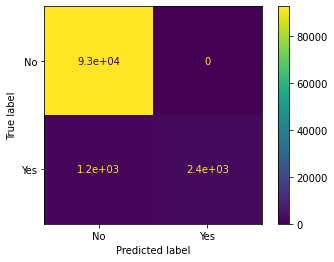

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy_score :", accuracy_score(y_test, y_pred))
print("roc_auc_score :", roc_auc_score(y_test, y_pred))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
cmd.plot()

##  Display classification performance metrics

หาค่าประสิทธิภาพอื่นๆของ classification model ของตัวนี้เพิ่มเติม

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Performance:")
print(" >accuracy = " + str(accuracy))
print(" >precision = " + str(precision))
print(" >recall = " + str(recall))
print(" >f1-score = " + str(f1))


Performance:
 >accuracy = 0.9880354151710936
 >precision = 1.0
 >recall = 0.677780891005884
 >f1-score = 0.8079492317969272


## Visualising the ROC curve
เป็นการวัดประสิทธิภาพที่ดีตัวหนึ่งของ binary classification 

ROC curve ของการตรวจค้นยานพาหนะ เป็นการนำเอา True Positive rate plot with False Positive Rate



In fact, any point on the blue line corresponds to a situation where True Positive Rate is equal to False Positive Rate.

 

All points above this line correspond to the situation where the proportion of correctly classified points belonging to the Positive class is greater than the proportion of incorrectly classified points belonging to the Negative class.

หมายความว่า ยิ่งเส้นสีส้มของเราห่างออกจากเส้นสีฟ้าไปข้างบนมากเท่าไหร่ก็แสดงว่า model ของเรา ทำการแยกแยะ ได้อย่างถูกต้องกว่า เช่น สมมติว่า มีของผิด กฏหมายในรถ ถ้าทำนายว่าโดนตรวจค้นแน่ๆ ก็จะกลัวก็อาจจะไม่ขับรถวันนี้ แต่ถ้า ทำนายว่าไม่โดนจับแน่แต่ทำนายผิด สุดท้ายแล้วเป็นความหวังที่คิดว่าไม่โดนตรวจค้น พอไปขับรถจริงโดนเรียกตรวจค้นก็เจอสิ่งผิดกฏหมายในรถ False Positive นั้นน่ากลัว ดังคำกล่าวของ <b>“False hopes are more dangerous than fears.”–J.R.R. Tolkein<b>

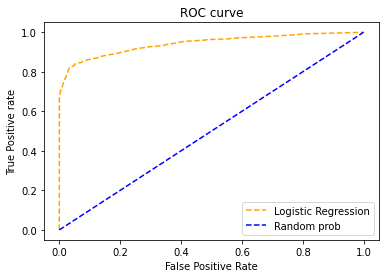

In [ ]:
from sklearn.metrics import roc_curve

pred_prob = classifier.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label='Random prob')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('classification ROC',dpi=300);    

## Applying k-Fold Cross-Validation
เพื่อดูว่าการแบ่งชุดข้อมูลในการ train model ดีหรือไม่ โดยจะได้ออกมาเป็นค่าเฉลี่ยของ Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.80 %
Standard Deviation: 0.03 %


## Applying Grid Search to find the best model and the best parameters
ทำเพื่อหาค่า ปรับจูน hyperparameter ให้ได้ model ที่ดีที่สุด ใช้ code ดังนี้
และต้องการจะวัดค่าประสิทธิภาพของ model ด้วย ROC curve แทนการใช้ Accuracy จึ่งแทนค่า ที่ scoring = "roc_auc"

### จากการทำ Grid Search เพื่อปรับจูน hypermeter ที่เหมาะสมเพื่อการใช้งาน ทำให้ผลที่ออกมาถูกต้องแม่นยำและมีประสิทธิภาพมากยิ่งขึ่น โดย Hypermeter เหมาะสมที่ได้คือ
&#39;C&#39;
= &#39;0.001&#39; และ penalty = &#39;L2&#39;

In [ ]:
from sklearn.model_selection import GridSearchCV
#np.logspace(-3,3,7) = array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])
# "penalty":["l1","l2"]}# l1 lasso l2 ridge

parameters = {'C': [0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001], 'penalty':['l1','l2','elasticnet']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_roc_auc = grid_search.best_score_
best_parameters = grid_search.best_params_
print("best_roc_auc: {:.2f} %".format(best_roc_auc*100))
print("Best Parameters:", best_parameters)

best_roc_auc: 93.73 %
Best Parameters: {'C': 0.001, 'penalty': 'l2'}


# ทำการ Training the Logistic Regression model ด้วย best parameter ที่ได้อีกครั้ง

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(penalty= 'l2', C=0.001)
classifier2.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Make y_pred2 from the new model and Making the Confusion Matrix
ใช้ Confusion Matrix มาช่วยในการ evaluation
จะเห็นว่ารูป Confusion Matrix และผลลัพธ์ที่ทำนาย y_pred2 เมื่อเทียบกับที่ทำนาย
y_pred ไว้ ผลออกมาเท่ากันเลย

[[92548     0]
 [ 1150  2419]]
accuracy_score : 0.9880354151710936
roc_auc_score : 0.838890445502942


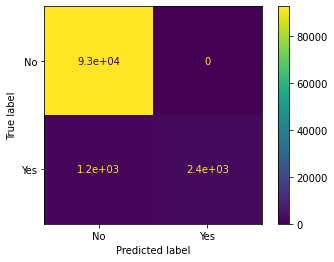

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score

y_pred2 = classifier2.predict(X_test)

cm = confusion_matrix(y_test, y_pred2)
print(cm)
print("accuracy_score :", accuracy_score(y_test, y_pred2))
print("roc_auc_score :", roc_auc_score(y_test, y_pred2))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
cmd.plot()

## Visualizing the ROC curve

### หากดูเส้นกราฟนี้แล้วจะสามารถพิจารณาได้ว่าผลการทำนายของเรานั้นดีแค่ไหนโดยทั่วไปจะถือว่าหากกราฟยิ่ง ชิดด้านบนมากก็ยิ่งแปลว่าทำนายได้ดี แต่หากกราฟเป็นเส้นตรงจะแสดงว่าไม่ดี กราฟชิดด้านบนมากหมายความว่าพื้นที่ใต้กราฟมาก ค่าพื้นที่ใต้กราฟ ROC นี้ถูกเรียกว่า AUC (area under curve)

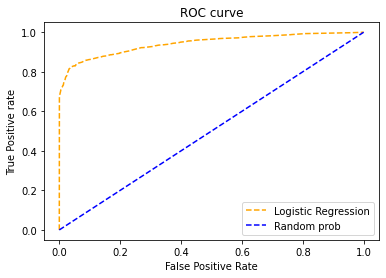

In [ ]:
from sklearn.metrics import roc_curve

pred_prob2 = classifier2.predict_proba(X_test)

fpr12, tpr12, thresh12 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs2 = [0 for i in range(len(y_test))]
p_fpr2, p_tpr2, _ = roc_curve(y_test, random_probs2, pos_label=1)


# plot roc curves
plt.plot(fpr12, tpr12, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr2, p_tpr2, linestyle='--', color='blue', label='Random prob')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('classification ROC',dpi=300);   

ตัวโมเดล roc_auc ทำได้ดีที่สุดตาม best_parameters ที่ได้ปรับจูนแล้ว

# ประโยชน์จากจุดมุ่งหมายข้างบน และ finding ที่ได้จากข้อมูลการปฏิบัติหน้าที่ของตำรวจใน Rhode Island State

จากทั้งสองภาคที่ผ่านมา จะพบว่าคนขับที่เป็นคนผิวดำและคนเชื้อสายละตินนั้น
จะโดนใบสั่ง ถูกค้นตัว ถูกตรวจค้นยานพาหนะ
และนำไปสู่การจับกุมมากกว่าคนขับที่เป็นคนผิวขาว
ดังเช่นการเรียกตรวจจากการฝ่าฝืนความเร็วนั้น
คนขับที่เป็นคนผิวดำจะโดนเขียนใบสั่งมากกว่า 20% ของคนผิวขาว
และเป็นคนขับเชื้อสายละตินก็จะโดนเขียนใบสั่งมากกว่า 30 %
ของคนผิวขาวในข้อหาฝ่าฝืนความเร็ว
และเป็นเช่นเดียวกัน การตรวจค้นตัวและตรวจค้นยานพาหนะ ทั้งนี้
จากการวิเคราะห์เพื่อหาคำตอบว่า
การตรวจค้นที่เกิดขึ้นนั้นเกิดจากความมีพิรุธขนาดไหน
และพื้นฐานก็ความน่าสงสัยเกี่ยวโยงกับ
เชื้อชาติและลักษณะของคนขับอย่างไรได้บ้าง
คำตอบก็คือ คนผิวดำ จะโดนตรวจค้นตัวและยานพาหนะ ด้วยความอคติ โดยที่
baseline ความน่าสงสัยและหลักฐานอ้างอิงอันน้อยนิดเมื่อเทียบกับคนผิวขาวทั่วไป
ส่วนอัตราการตรวจค้นจากเชื้อชาติที่มีอิทธิพลในการอคติทำให้อัตราการค้นพ้นสิ่งผิ
ดกฏหมายก็มากขึ้นด้วย
ซึ่งไม่ได้หมายความว่าสิ่งที่ผิดกฏหมายจะอยู่กับคนผิวดำเป็นอัตราส่วนมากกว่า
เพียงแต่ว่าอัตราการตรวจค้นที่กระทำต่อคนผิวขาวนั้นน้อยกว่า จากตรงนี้
ข้อมูลทำให้เราเห็นได้ชัดเจนว่า
สองมาตรฐานในการปฏิบัติงานของตำรวจนั้นมีอยู่จริง





## จากจุดมุ่งหมายของ classification model นี้





### 1.ถ้านำไปใช้ที่ผิดศีลธรรม ทำให้ผู้ที่ต้องการกระทำผิดกฎหมายสามารถเลือกใช้ Transporter ตามประเภท, ลักษณะ, เชื้อชาติ, เพศแบบไหนที่จะสามารถหลีกเลี่ยงการจับกุม หลีกเลี่ยงการถูกตรวจค้น หรือแม้กระทั่งหลีกเลียงการฝ่าฝืนกฏจราจรให้ได้มากที่สุด เพื่อลดความเสี่ยงที่จะทำให้เกิดการถูกตรวจค้นหรือโดนค้นหาสิ่งผิดกฎหมายในยานพาหนะในที่สุุด

### 2.นำไปใช้เพื่อให้เกิดประโยชน์ และเพิ่มประสิทธิภาพการทำงานของตำรวจ ทำให้ตำรวจไม่เกิด Bias หรืออคติต่อกลุ่มบุคคลใดกลุ่มบุคคลหนึ่งมากเกินไป และไม่ปล่อยปะละเลยกับอีกกลุ่มบุคคลหนึ่ง ปฏิบัติอย่างเท่าเทียมกันต่อทุกๆคน โดยไม่คำนึงถึงเชื้อชาติ เพศ อายุุ ทำให้ภาพลักษณ์ในการปฏิบัติหน้าที่ของตำรวจมีความยุติธรรม โปร่งใสและรอบคอบมากยิ่งขึ้น ซึ่งอาจจะทำให้ได้รับความร่วมมือจากประชาชนเป็นอย่างดีในการสืบสวน สอบสวน หรือการให้ข้อมูลที่เป็นประโยชน์กับตำรวจในการปฏิบัติหน้าที่ต่อไป